# Text Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def token_lookup():
    """
    Generate a dict to turn punctuation into a token.
    :return: Tokenized dictionary where the key is the punctuation and the value is the token
    """

    punctuation_tokenizer = {'.':'||Period||',
                             ',':'||Comma||',
                             '"':'||Quotation_Mark||',
                             ';':'||Semicolon||',
                             '!':'||Exclamation_Mark||',
                             '?':'||Question_Mark||',
                             '(':'||Left_Parentheses||',
                             ')':'||Right_Parentheses||',
                             '-':'||Dash||',
                             '\n':'||New_Line||',
                             '[':'||Open_Bracket||',
                             ']':'||Close_Bracket||'}
    
    return punctuation_tokenizer

def get_text(data_dir, token_lookup):
    """
    Returns a list of all single words and tokenized punctuation
    :param data_dir: Data directory of the desired txt file
    :param token_lookup: The function that returns a tokenizer
    :return: The list of tokenized text
    """
    #Opening the File
    text = open(data_dir, 'r')
    text = text.read()
    
    #Tokenizing the data
    tokenizer = token_lookup()

    for key, token in tokenizer.items():
        text = text.replace(key, ' {} '.format(token))
    
    #Lowercasing all words and splitting the words into items in a list
    text_list = text.lower().split()
    
    return text_list

def create_lookup_tables(text):
    """
    Create lookup tables for vocabulary
    :param text: The grouped corpus of all text split into words
    :return: A tuple of dicts (vocab_to_int, int_to_vocab)
    """
    # TODO: Implement Function
    counts = Counter(text)
    
    vocab_to_int = {key:(i) for i, key in enumerate(counts)}
    int_to_vocab = {vocab_to_int[key]:key for key in counts}
    
    # return tuple
    return (vocab_to_int, int_to_vocab)

# Texts Being Used

Texts I will be using:
1. Karl Marx's [**Communist Manifesto**](https://www.gutenberg.org/ebooks/61)
2. Friedrich Wilhelm Nietzsche's [**Beyond Good and Evil**](https://www.gutenberg.org/ebooks/4363)
3. Friedrich Wilhelm Nietzsche's [**Thus Spoke Zarathustra**](https://www.gutenberg.org/ebooks/1998)
4. Søren Kierkegaard's [**Selected Writings, including Fear and Trembling**](https://www.gutenberg.org/ebooks/60333)

**All of these works are in the Public Domain**

These texts are provided by [Project Gutenberg](https://www.gutenberg.org/)

<br>

**Extra text to create another model at the end:**

Cleaned Shakespeare text by [Andrej Kaparthy](https://github.com/karpathy/char-rnn)

## Loading Marx, Neitzche, Kierkegaard

In [3]:
data_dir = '/notebooks/storage/Clean Text/'

# Getting Marx's Communist Manifesto
marx = get_text(data_dir+'Communist Manifesto.txt', token_lookup)

# Getting Nietzsche's Beyond Good and Evil
Neitzsche_BGE = get_text(data_dir+'Beyond Good and Evil.txt', token_lookup)

# Getting Nietzsche's Thus Spoke Zarathustra
Neitzsche_THZ = get_text(data_dir+'Thus Spoke Zarathustra.txt', token_lookup)

# Getting Søren Kierkegaard's Selected Writings
kierkegaard = get_text(data_dir+'kierkegaard.txt', token_lookup)

#This is the value we use for padding in our sequences, which will be useful when created generated text
SPECIAL_WORDS = {'PADDING': '<PAD>'}

#Creating our text corpus by combining all the texts above
total_text = Neitzsche_THZ + Neitzsche_BGE + marx + kierkegaard + list(SPECIAL_WORDS.values())

In [27]:
total_num = len(marx) + len(Neitzsche_BGE) + len(Neitzsche_THZ) + len(kierkegaard)

print("Marx's Contribution:", round(len(marx)/total_num, 2))
print("THZ Contribution:", round(len(Neitzsche_THZ)/total_num, 2))
print("BGE Contribution:", round(len(Neitzsche_BGE)/total_num, 2))
print("Kierkegaard's Contribution:", round(len(kierkegaard)/total_num, 2))

Marx's Contribution: 0.05
THZ Contribution: 0.39
BGE Contribution: 0.26
Kierkegaard's Contribution: 0.3


## Loading Shakespeare

In [4]:
data_dir = '/notebooks/storage/Clean Text/'
SPECIAL_WORDS = {'PADDING': '<PAD>'}

# Getting shakespeare text
shakespeare_text = get_text(data_dir+'shakespeare.txt', token_lookup)

#Adding Padding
shakespeare_text += list(SPECIAL_WORDS.values())

# Looking look at our data

## Marx, Neitzche, Kierkegaard

In [5]:
#Getting the unique words and their counts in the data
counts = Counter(total_text)

#Printing the number of unique words in the corpus
print('Number of unique words in the corpus:', len(counts))

#Printing the top 50 most common words
print('Most Common Words\n')
print(counts.most_common()[:50])

#Printing the least 50 most common words
print('\nLeast Common Words\n')
print(counts.most_common()[-50:])

Number of unique words in the corpus: 17334
Most Common Words

[('||new_line||', 26492), ('||comma||', 19045), ('the', 12866), ('and', 8949), ('of', 7222), ('||period||', 6826), ('to', 6529), ('||dash||', 5791), ('is', 4560), ('a', 4468), ('in', 4092), ('it', 3262), ('that', 3220), ('||exclamation_mark||', 2908), ('i', 2609), ('for', 2425), ('he', 2355), ('||quotation_mark||', 2354), ('||semicolon||', 2186), ('not', 2161), ('as', 1915), ('be', 1873), ('his', 1788), ('one', 1781), ('with', 1771), ('all', 1709), ('but', 1577), ('which', 1454), ('||question_mark||', 1360), ('this', 1324), ('have', 1262), ('they', 1195), ('my', 1190), ('who', 1182), ('on', 1035), ('at', 1024), ('are', 1005), ('will', 954), ('him', 949), ('by', 924), ('me', 916), ('there', 905), ('what', 870), ('was', 863), ('thou', 847), ('from', 844), ('their', 833), ('so', 811), ('do', 810), ('man', 800)]

Least Common Words

[('undergone', 1), ('interminable', 1), ('invocation', 1), ('unqualified', 1), ('autre', 1), ('c

## Shakespeare

In [6]:
#Getting the unique words and counts of Shakespeare
shakespeare_counts = Counter(shakespeare_text)

#Printing the number of unique words in the corpus
print('Number of unique words in the corpus:', len(shakespeare_counts))

#Printing the top 50 most common words
print('Most Common Words\n')
print(shakespeare_counts.most_common()[:50])

#Printing the least 50 most common words
print('\nLeast Common Words\n')
print(shakespeare_counts.most_common()[-50:])

Number of unique words in the corpus: 14104
Most Common Words

[('||new_line||', 40000), ('||comma||', 19846), ('||period||', 7885), ('the', 6283), ('and', 5690), ('to', 4895), ('i', 4554), ('of', 3756), ('||semicolon||', 3628), ('my', 3116), ('you', 3101), ('a', 3005), ('that', 2565), ('||question_mark||', 2462), ('in', 2365), ('||exclamation_mark||', 2172), ('is', 2065), ('not', 1988), ('for', 1902), ('||dash||', 1897), ('with', 1809), ('it', 1730), ('me', 1707), ('be', 1694), ('your', 1684), ('his', 1549), ('but', 1507), ('he', 1492), ('this', 1487), ('have', 1437), ('as', 1419), ('thou', 1401), ('him', 1156), ('so', 1155), ('what', 1119), ('thy', 1059), ('will', 1039), ('by', 903), ('no', 897), ('all', 870), ('king', 867), ('we', 860), ('shall', 837), ('her', 808), ('if', 805), ('our', 786), ('are', 779), ('do', 767), ('thee', 737), ('now', 690)]

Least Common Words

[('vouched', 1), ('rarities', 1), ('drenched', 1), ('freshness', 1), ('glosses', 1), ('pockets', 1), ('claribel', 1)

# Creating our Lookup Tables

Lookup Tables provide words to be translated into integers that will be used as inputs into our network. Then we can use them again to translate the network's outputs from integers into the words.

In [7]:
#Lookup Tables are dictionaries that pair the integers and words together
vocab_to_int, int_to_vocab = create_lookup_tables(total_text)

print('Translates words to integers')
print(list(vocab_to_int.items())[:5])

print('\nTranslates integers to words')
print(list(int_to_vocab.items())[:5])

Translates words to integers
[('when', 0), ('zarathustra', 1), ('was', 2), ('thirty', 3), ('years', 4)]

Translates integers to words
[(0, 'when'), (1, 'zarathustra'), (2, 'was'), (3, 'thirty'), (4, 'years')]


In [8]:
#Lookup Tables are dictionaries that pair the integers and words together
SP_vocab_to_int, SP_int_to_vocab = create_lookup_tables(shakespeare_text)

print('Translates words to integers')
print(list(SP_vocab_to_int.items())[:5])

print('\nTranslates integers to words')
print(list(SP_int_to_vocab.items())[:5])

Translates words to integers
[('first', 0), ('citizen:', 1), ('||new_line||', 2), ('before', 3), ('we', 4)]

Translates integers to words
[(0, 'first'), (1, 'citizen:'), (2, '||new_line||'), (3, 'before'), (4, 'we')]


# Preprocessing data for our model

We will convert the text data into integers using the lookup tables above

In [9]:
#Using vocab_to_int lookup table to convert our text to numerical data
int_text = [vocab_to_int[word] for word in total_text]

print('Original Text:')
print(total_text[:5])

print('\nNumerical Data:')
print(int_text[:5])

Original Text:
['when', 'zarathustra', 'was', 'thirty', 'years']

Numerical Data:
[0, 1, 2, 3, 4]


In [10]:
#Using vocab_to_int lookup table to convert our text to numerical data
SP_int_text = [SP_vocab_to_int[word] for word in shakespeare_text]

print('Original Text:')
print(shakespeare_text[:5])

print('\nNumerical Data:')
print(SP_int_text[:5])

Original Text:
['first', 'citizen:', '||new_line||', 'before', 'we']

Numerical Data:
[0, 1, 2, 3, 4]


## What is an input into an RNN

For an RNN, each input is a sequence of data with length _t_ , for *t* time-steps.

![RNN](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

**So each x needs to have a length of t**

${\LARGE X_t \in R^t}$

<br><br>




## How to create our features

This is our hypothetical data:

    words = [1, 2, 3, 4, 5, 6, 7]
    

1. Choose t

        t = 4
**So the length of each sequence will be 4**


2. Create sequences from words
        
        seq1 = [1, 2, 3, 4]
        seq2 = [2, 3, 4, 5]
        seq3 = [3, 4, 5, 6]
        seq4 = [4, 5, 6, 7]        
**As you can see there are 4 possible sequences total. However, we would not use the last sequence to acquire our targets. Please read below!**

    

<br><br>
## How to gets the targets?
For better understanding, I will first explain the goal of the model.

**Model's Goal: Given a sequence of words, we would like to predict the next word after the sequence**

Using the same example from above:

    words = [1, 2, 3, 4, 5, 6, 7]
    
    seq1 = [1, 2, 3, 4]
    target1 = 5
    
    seq2 = [2, 3, 4, 5]
    target2 = 6
    
    seq3 = [3, 4, 5, 6]
    target3 = 7
    
    seq4 = [4, 5, 6, 7]
    target4 = NAN
**As we can see here we cannot use seq4 since there is no target for it**


    
## Conclusion:

${\normalsize \textit{W is total number of words in full dataset}}$

${\normalsize \textit{t is sequence length}}$

${\normalsize \textit{N is number of sequences and its targets}}$
<br><br>

${\large \textit{N = W - t}}$

Using the same example:

    words = [1, 2, 3, 4, 5, 6, 7]
    
    #W = 7
    W = len(words)
    t = 4
    
    #N = 3
    N = W - t 
    
    features = []
    targets = []
    
    for i in range(N):
        idx = t + i
        features.append(words[i:idx])
        targets.append(words[idx])
    
Results:

        features = [[1, 2, 3, 4],
                    [2, 3, 4, 5],
                    [3, 4, 5, 6]]
                    
        targets = [5, 6, 7]
        
<br><br>
        
## Batching Data

The function below will create a PyTorch [DataLoader](https://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) object that will load both the features and the targets.

**Batching is the separation of data into groups so that the model will learn based on each batch**

In [11]:
from torch.utils.data import TensorDataset, DataLoader


def batch_data(words, sequence_length, batch_size):
    """
    Batch the neural network data using DataLoader
    :param words: The word ids of the text
    :param sequence_length: The sequence length of each batch
    :param batch_size: The size of each batch; the number of sequences in a batch
    :return: DataLoader with batched data
    """
    
    #This is the number of sequences and targets that is taken from words
    num_sequences = len(words) - sequence_length
    
    #Getting feautures
    features = torch.zeros(num_sequences, sequence_length, dtype=torch.long)
    targets = torch.zeros(num_sequences, dtype=torch.long)
    
    for i in range(num_sequences):
        idx = sequence_length + i
        features[i] = torch.tensor(words[i:idx])
        targets[i] = words[idx]
        
    data = TensorDataset(features, targets)
    dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

    
    return dataloader

## Checking for GPU access

In [12]:
import torch

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('No GPU Access, will use the CPU to train the model')
else:
    print('You have access to a GPU!')

You have access to a GPU!


# Building the Network

In [13]:
import torch.nn as nn

class LSTM_Model(nn.Module):
    
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.5):
        """
        Initialize the PyTorch RNN Module
        :param vocab_size: The number of input dimensions of the neural network (the size of the vocabulary)
        :param output_size: The number of output dimensions of the neural network
        :param embedding_dim: The size of embeddings, should you choose to use them        
        :param hidden_dim: The size of the hidden layer outputs
        :param n_layers: Number of layers in the LSTM
        :param dropout: dropout to add in between LSTM/GRU layers
        """
        super(LSTM_Model, self).__init__()
        
        # set class variables
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        # Embedding layer to translate Word2Vec
        self.embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
        
        #input_size is the amount of time steps per input, or the num of features per input
        #hidden_dim is the number of features in the hidden state or the dimensionality of the hidden state
        
        self.LSTM = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=n_layers, dropout=dropout,
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, nn_input, hidden):
        """
        Forward propagation of the neural network
        :param nn_input: The input to the neural network
        :param hidden: The hidden state        
        :return: Two Tensors, the output of the neural network and the latest hidden state
        """
        #Getting batch size
        batch_size = nn_input.size(0)
        
        
        # TODO: Implement function
        embed_output = self.embed(nn_input)
        
        #Output shape is (batch_size, sequence_length, hidden_dim)
        out, hidden = self.LSTM(embed_output, hidden)
        
        #Flatenning the output to be a 2d matrix of (batch_size * sequence_length, hidden_dim)
        out = out.contiguous().view(-1, self.hidden_dim)
        
        #Applying Fully-Connected Layer to output predictions of the next word
        out = self.fc(out)
        
        # reshape into (batch_size, seq_length, output_size)
        output = out.view(batch_size, -1, self.output_size)
        
        # getting the output from the from the last input from each sequence
        out = output[:, -1]
        
        # return one batch of output word scores and the hidden state
        return out, hidden
    
    
    def init_hidden(self, batch_size):
        '''
        Initialize the hidden state of an LSTM
        :param batch_size: The batch_size of the hidden state
        :return: hidden state of dims (n_layers, batch_size, hidden_dim)
        '''
        # Implement function
        
        # initialize hidden state with zero weights, and move to GPU if available
        
        weight = next(self.parameters()).data
        
        #h_0: is the initital hidden state with n_layers x batch_size x hidden_dim dimensions
        #c_0: is the initital cell state with n_layers x batch_size x hidden_dim dimensions
        
        h_0 = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        c_0 = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        
        if (train_on_gpu):
            hidden = (h_0.cuda(), c_0.cuda())
            
        else:
            hidden = (h_0, c_0)
        
        return hidden

# Defining the Training Function

In [14]:
def forward_back_prop(lstm, optimizer, criterion, inp, target, hidden):
    """
    Forward and backward propagation on the neural network
    :param lstm: The PyTorch Module that holds the neural network
    :param optimizer: The PyTorch optimizer for the neural network
    :param criterion: The PyTorch loss function
    :param inp: A batch of input to the neural network
    :param target: The target output for the batch of input
    :return: The loss and the latest hidden state Tensor
    """
    
    h = tuple([each.data for each in hidden])
    
    # move data to GPU, if available
    if train_on_gpu:
        inp = inp.cuda()
        target = target.cuda()
        
    #Clearing gradients
    optimizer.zero_grad()
    
    output, h = lstm(inp, h)
    
    # perform backpropagation and optimization
    loss = criterion(output, target)
    loss.backward()
    
    # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
    clip = 5
    nn.utils.clip_grad_norm_(lstm.parameters(), clip)
    optimizer.step()
    
    # return the loss over a batch and the hidden state produced by our model
    return loss.item(), h


def train_lstm(lstm, batch_size, optimizer, criterion, n_epochs, data_dir, model_name, show_every_n_batches=100):
    """
    Training the Model and recording the losses
    :param lstm: The PyTorch Module that holds the neural network
    :param batch_size: Number of sequences per batch
    :param optimizer: The PyTorch optimizer for the neural network
    :param criterion: The PyTorch loss function
    :param n_epochs: Number of epochs or number of training iterations
    :param data_dir: Data Directory to save the model
    :param model_name: Model name used to save the model
    :show_every_n_batches: Print avg loss of n batches
    """
    batch_losses = []
    
    lstm.train()
    
    total_avg_losses = []
    
    print("Training {} for {} epoch(s)...".format(model_name, n_epochs))
    for epoch_i in range(1, n_epochs + 1):
        
        # initialize hidden state
        hidden = lstm.init_hidden(batch_size)
        
        # Getting all the losses per epoch
        epoch_losses = []
        
        for batch_i, (inputs, labels) in enumerate(train_loader, 1):
            
            # make sure you iterate over completely full batches, only
            n_batches = len(train_loader.dataset)//batch_size
            if(batch_i > n_batches):
                break
            
            # forward, back prop
            loss, hidden = forward_back_prop(lstm, optimizer, criterion, inputs, labels, hidden)          
            # record loss
            batch_losses.append(loss)
            epoch_losses.append(loss)

            # printing loss stats
            if batch_i % show_every_n_batches == 0:
                print('Epoch: {:>4}/{:<4}  Loss: {}\n'.format(
                    epoch_i, n_epochs, np.average(batch_losses)))
                batch_losses = []
                
        print('Epoch {:>2}:  Avg Loss: {}\n'.format(epoch_i, np.average(epoch_losses)))
        
        # record avg loss per epoch
        total_avg_losses.append(np.average(epoch_losses))
                
    #Saving model
    filename = data_dir + '/{}.pt'.format(model_name)
    torch.save(lstm, filename)
    print('Saved model to {}'.format(filename))
    
    # returns a trained rnn and average losses per epoch
    return lstm, total_avg_losses

# Loading Dataloaders

In [15]:
# Sequence Length
sequence_length = 20  # of words in a sequence
# Batch Size
batch_size = 128

# Loading dataloader
train_loader = batch_data(int_text, sequence_length, batch_size)

# Data Directory to save the model
data_dir = '/notebooks/storage/models'

# First Model

## Defining Hyperparameters

In [16]:
# Number of Epochs
num_epochs = 20
# Learning Rate
learning_rate = 0.001

# Model parameters
# Vocab size
vocab_size = len(vocab_to_int)
# Output size
output_size = len(vocab_to_int)
# Embedding Dimension
embedding_dim = 300
# Hidden Dimension
hidden_dim = 256
# Number of RNN Layers
n_layers = 2

# Show stats for every n number of batches
show_every_n_batches = 500

## Training the model

In [17]:
first_lstm = LSTM_Model(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.5)

if train_on_gpu:
    first_lstm.cuda()

# defining loss and optimization functions for training
optimizer = torch.optim.Adam(first_lstm.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# training the models
model_name = 'first_model'
trained_lstm1, lstm1_losses = train_lstm(first_lstm, batch_size, optimizer, criterion, num_epochs, 
                                         data_dir, model_name, show_every_n_batches)


Training first_model for 20 epoch(s)...
Epoch:    1/20    Loss: 6.410131114006043

Epoch:    1/20    Loss: 5.94573709487915

Epoch:    1/20    Loss: 5.7622718925476075

Epoch:    1/20    Loss: 5.619749179840088

Epoch  1:  Avg Loss: 5.867538001026996

Epoch:    2/20    Loss: 5.393902027553507

Epoch:    2/20    Loss: 5.264907137870789

Epoch:    2/20    Loss: 5.236047771453857

Epoch:    2/20    Loss: 5.184909315109253

Epoch  2:  Avg Loss: 5.230426312290306

Epoch:    3/20    Loss: 5.02468630765051

Epoch:    3/20    Loss: 4.909070492744446

Epoch:    3/20    Loss: 4.91692320728302

Epoch:    3/20    Loss: 4.886540089607239

Epoch  3:  Avg Loss: 4.904478847581806

Epoch:    4/20    Loss: 4.737815447986928

Epoch:    4/20    Loss: 4.642378649234772

Epoch:    4/20    Loss: 4.649520330429077

Epoch:    4/20    Loss: 4.654421565532684

Epoch  4:  Avg Loss: 4.644824525085979

Epoch:    5/20    Loss: 4.510243603734158

Epoch:    5/20    Loss: 4.401154560565948

Epoch:    5/20    Loss: 4.42

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LSTM_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Saved model to /notebooks/storage/models/first_model.pt


# Second Model

## Defining Hyperparameters

In [18]:
# Number of Epochs
num_epochs = 20
# Learning Rate
learning_rate = 0.001

# Model parameters
# Vocab size
vocab_size = len(vocab_to_int)
# Output size
output_size = len(vocab_to_int)
# Embedding Dimension
embedding_dim = 300
# Hidden Dimension
hidden_dim = 512
# Number of RNN Layers
n_layers = 2

# Show stats for every n number of batches
show_every_n_batches = 500

## Training the Model

In [19]:
second_lstm = LSTM_Model(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.5)

if train_on_gpu:
    second_lstm.cuda()

# defining loss and optimization functions for training
optimizer = torch.optim.Adam(second_lstm.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# training the models
model_name = 'second_lstm'
trained_lstm2, lstm2_losses = train_lstm(second_lstm, batch_size, optimizer, criterion, num_epochs, 
                                         data_dir, model_name, show_every_n_batches)


Training second_lstm for 20 epoch(s)...
Epoch:    1/20    Loss: 6.345058958053589

Epoch:    1/20    Loss: 5.841878464698792

Epoch:    1/20    Loss: 5.654151798248291

Epoch:    1/20    Loss: 5.522163987159729

Epoch  1:  Avg Loss: 5.783014484073805

Epoch:    2/20    Loss: 5.324335334012327

Epoch:    2/20    Loss: 5.152674628257752

Epoch:    2/20    Loss: 5.138628944396973

Epoch:    2/20    Loss: 5.105397837638855

Epoch  2:  Avg Loss: 5.131264875764432

Epoch:    3/20    Loss: 4.903194594810897

Epoch:    3/20    Loss: 4.783787721633911

Epoch:    3/20    Loss: 4.75671909236908

Epoch:    3/20    Loss: 4.730283627510071

Epoch  3:  Avg Loss: 4.76151790467393

Epoch:    4/20    Loss: 4.567620548164898

Epoch:    4/20    Loss: 4.410541118144989

Epoch:    4/20    Loss: 4.426941706180573

Epoch:    4/20    Loss: 4.4551430172920226

Epoch  4:  Avg Loss: 4.432345728112702

Epoch:    5/20    Loss: 4.231705308227796

Epoch:    5/20    Loss: 4.116945769309997

Epoch:    5/20    Loss: 4.1

# Shakespeare Model

In [54]:
# Loading dataloader for Shakespeare
train_loader = batch_data(SP_int_text, sequence_length, batch_size)

In [55]:
# Number of Epochs
num_epochs = 20
# Learning Rate
learning_rate = 0.001

# Model parameters
# Vocab size
vocab_size = len(vocab_to_int)
# Output size
output_size = len(vocab_to_int)
# Embedding Dimension
embedding_dim = 300
# Hidden Dimension
hidden_dim = 512
# Number of RNN Layers
n_layers = 2

# Show stats for every n number of batches
show_every_n_batches = 500

In [56]:
shakespeare_lstm = LSTM_Model(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.5)

if train_on_gpu:
    shakespeare_lstm.cuda()

# defining loss and optimization functions for training
optimizer = torch.optim.Adam(shakespeare_lstm.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# training the models
model_name = 'shakespeare_model'
SP_trained_lstm, SP_losses = train_lstm(shakespeare_lstm, batch_size, optimizer, criterion, num_epochs, 
                             data_dir, model_name, show_every_n_batches)


Training shakespeare_model for 20 epoch(s)...
Epoch:    1/20    Loss: 5.799053761482239

Epoch:    1/20    Loss: 5.295229989051819

Epoch:    1/20    Loss: 5.127913645744323

Epoch:    1/20    Loss: 5.025856725692749

Epoch  1:  Avg Loss: 5.281256731805966

Epoch:    2/20    Loss: 4.775033948088643

Epoch:    2/20    Loss: 4.7069719743728635

Epoch:    2/20    Loss: 4.67622645521164

Epoch:    2/20    Loss: 4.651222707271576

Epoch  2:  Avg Loss: 4.675110396095886

Epoch:    3/20    Loss: 4.410891235044539

Epoch:    3/20    Loss: 4.359943438529968

Epoch:    3/20    Loss: 4.368300042152405

Epoch:    3/20    Loss: 4.355411131858825

Epoch  3:  Avg Loss: 4.3572211503766

Epoch:    4/20    Loss: 4.13747726614319

Epoch:    4/20    Loss: 4.053384436130524

Epoch:    4/20    Loss: 4.074196995735169

Epoch:    4/20    Loss: 4.099409326076508

Epoch  4:  Avg Loss: 4.06981412277343

Epoch:    5/20    Loss: 3.8463789431797473

Epoch:    5/20    Loss: 3.7665356936454772

Epoch:    5/20    Loss

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LSTM_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Saved model to /notebooks/storage/Outputs/shakespeare_model.pt


# Plotting losses

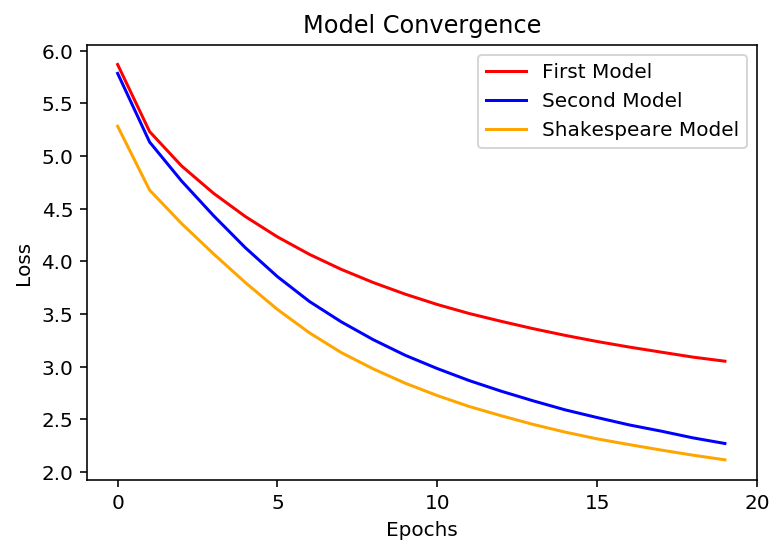

In [58]:
plt.plot(lstm1_losses, color='red')
plt.plot(lstm2_losses, color='blue')
plt.plot(SP_losses, color='orange')
plt.legend(labels=['First Model', 'Second Model', 'Shakespeare Model'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(ticks=[0, 5, 10, 15, 20])
plt.title('Model Convergence')
plt.savefig('final_plot.jpg', dpi=200)

# Loading Models and Table loaders

You may load this without retraining the models

In [15]:
import torch
# Data directory where the models were saved
data_dir = '/notebooks/storage/models/'

# Trained LSTMs on Marx, Neitzche and Kierkegaard
trained_lstm1 = torch.load(data_dir + 'first_model.pt')
trained_lstm2 = torch.load(data_dir + 'second_lstm.pt')

# Trained LSTM on Shakespeare
SP_trained_lstm = torch.load(data_dir + 'shakespeare_model.pt')

# Sequence Length
sequence_length = 20  # of words in a sequence
# Batch Size
batch_size = 128

# Generating Text

In [16]:
import torch.nn.functional as F

def generate(lstm, prime_id, int_to_vocab, token_lookup, pad_value, filename, data_dir=None, predict_len=100):
    """
    Generate text using the neural network and saves to a txt file
    :param lstm: The PyTorch Module that holds the trained neural network
    :param prime_id: The word id to start the first prediction
    :param int_to_vocab: Dict of word id keys to word values
    :param token_dict: Dict of puncuation tokens keys to puncuation values
    :param pad_value: The value used to pad a sequence
    :param filename: Name of the txt file to save to
    :param data_dir: Data Directory to save the txt file
    :param predict_len: The length of text to generate
    :return: The generated text
    """
    token_dict = token_lookup()
    lstm.eval()
    
    # create a sequence (batch_size=1) with the prime_id
    current_seq = np.full((1, sequence_length), pad_value)
    current_seq[-1][-1] = prime_id
    predicted = [int_to_vocab[prime_id]]
    
    for _ in range(predict_len):
        if train_on_gpu:
            current_seq = torch.LongTensor(current_seq).cuda()
        else:
            current_seq = torch.LongTensor(current_seq)
        
        # initialize the hidden state
        hidden = lstm.init_hidden(current_seq.size(0))
        
        # get the output of the rnn
        output, _ = lstm(current_seq, hidden)
        
        # get the next word probabilities
        p = F.softmax(output, dim=1).data
        if(train_on_gpu):
            p = p.cpu() # move to cpu
         
        # use top_k sampling to get the index of the next word
        top_k = 5
        p, top_i = p.topk(top_k)
        top_i = top_i.numpy().squeeze()
        
        # select the likely next word index with some element of randomness
        p = p.numpy().squeeze()
        word_i = np.random.choice(top_i, p=p/p.sum())
        
        # retrieve that word from the dictionary
        word = int_to_vocab[word_i]
        predicted.append(word)     
        
        # the generated word becomes the next "current sequence" and the cycle can continue
        current_seq = np.roll(current_seq.cpu(), -1, 1)
        current_seq[-1][-1] = word_i
    
    gen_sentences = ' '.join(predicted)
    
    # Replace punctuation tokens
    for key, token in token_dict.items():
        ending = ' ' if key in ['\n', '(', '"'] else ''
        gen_sentences = gen_sentences.replace(' ' + token.lower(), key)
    gen_sentences = gen_sentences.replace('\n ', '\n')
    gen_sentences = gen_sentences.replace('( ', '(')
    
    
    #Saving files
    if data_dir==None:
        data_dir = os.getcwd() + '/'
        
    else:
        data_dir += '/'
        
    data_dir = data_dir + '{}.txt'.format(filename)
    f = open(data_dir, 'w')
    f.write(gen_sentences)
    f.close()
    
    print('Saved {}.txt file to {}'.format(filename, data_dir))
    
    # return all the sentences
    return gen_sentences

# What is Truth?

Here I will get text from the first and second model by the first input to be the word 'Truth'

## Generating Text Using First Model

In [17]:
gen_length = 400 # length of the outputted text in words
first_word = 'truth' # First Word

data_dir = '/notebooks/storage/Outputs'
pad_word = '<PAD>'

#Change model
generated_script = generate(trained_lstm1, vocab_to_int[first_word], int_to_vocab, token_lookup, 
                            vocab_to_int[pad_word], 'lstm1_truth', data_dir, gen_length)
print(generated_script)

Saved lstm1_truth.txt file to /notebooks/storage/Outputs/lstm1_truth.txt
truth
and the most marked types of the thousandfold failures.

the bourgeoisie has subjected the workshop of the population
in which the feeding of the proletariat produces.

in the formation of the bourgeoisie have continually in the world
building is won in the public advertiser it is not only a new success.

the ceremony is the prospect the model hammer of the gods' heart,
but their highest security, indications of being a military
revolution.

the bourgeoisie, historically capital in the ecstasies of the
proletariat went forth into the giant years. it happens more as a
rock, the unchangeable and the apparent type of a legion
of which constitutes the predicate consequences of his actions stimulate
him, and the climax and confined atmosphere of the messiah had been newly
decorated, and he stood through his eyes, he upbraided the ram doubtfully, and
respected his knife. and behold! he is not conversant, the more 

## Generating Text Using Second Model

In [19]:
gen_length = 400 # length of the outputted text in words
first_word = 'truth' # First Word

data_dir = '/notebooks/storage/Outputs'
pad_word = '<PAD>'

#Change model
generated_script = generate(trained_lstm2, vocab_to_int[first_word], int_to_vocab, token_lookup, 
                            vocab_to_int[pad_word], 'lstm2_truth', data_dir, gen_length)
print(generated_script)

Saved lstm2_truth.txt file to /notebooks/storage/Outputs/lstm2_truth.txt
truth
unto me, shaggily and fawningly!

ah, my friend, ye judges! hush! ah! whither hath the world now become
thy home?

ah, a statue- dog, a fool dwelleth its woe, the image of my bowels,
and succumb, and whizzing out in the stone! and yet wilt thou do
not find a dog?

thou drinkest copiously at the sea: for thy whip, thine seeking
secureth me:i suffer. ah, whither is it the superman! ” but iheard not, ” said the
soothsayer: “o zarathustra, ” answered zarathustra, “as a wanderer, a saint, and
speech with golden wine.

“o zarathustra, ” said zarathustra, “as a shrewd man, and a new
forest, saith the larcenous craving of the vine.

but he who discovered his monsters is he who seeketh and his
mouth, and raised himself. intoxicating joy is the cave of the earth.

i love him who chasteneth his limbs, and that he will not teach it,
he is the only jesus christ that spoke when he sat with
the ground, he besought him, and

# Generating Text Using Shakespeare

In [20]:
gen_length = 400 # length of the outputted text in words
first_word = 'romeo:' # First Word

data_dir = '/notebooks/storage/Outputs'
pad_word = '<PAD>'

#Change model
generated_script = generate(SP_trained_lstm, SP_vocab_to_int[first_word], SP_int_to_vocab, token_lookup, 
                            SP_vocab_to_int[pad_word], 'AI_Shakespeare', data_dir, gen_length)
print(generated_script)

Saved AI_Shakespeare.txt file to /notebooks/storage/Outputs/AI_Shakespeare.txt
romeo: brick brick bitterest guiltless turn: bitterest foaming hearth sunshine sunshine sunshine congeal'd congeal'd snarl! '
but, ere the sun advance of the air,
that he will show you shining a gentleman,
and entertain a preachment in gay ornaments,
and strip her farewell with her peaceful slaves,
which she is froward, that he is deadly heir.

king richard iii:
what stays of this amendment, lords and her
lord grey of reprieve in his bed,
which in the view of heaven we have been
the charges of my blood.

sicinius:
i cannot tell it.

paulina:
no.

first senator:
i do bite thee for thy word:
i would dissemble but a thousand language;
and i forgive my government to thee,
and i am sworn to take armour by my heart.

mercutio:
o, ye're my flower.

mercutio:
o, ay, curtis, ay: and therefore fire us; i pray you,
you have got it, sir, to give you thanks.

petruchio:
why, sir, 'tis a day that is not for you;
prick is 